# Bayesian Linear Regression with Synthetic Data
**Objective:** Implement Bayesian linear regression using conjugate priors and analyze posterior distributions

## 1. Import Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
np.random.seed(42)

## 2. Generate Synthetic Data
True model: $y = 1.0 + 2.5x + \epsilon$, $\epsilon \sim \mathcal{N}(0, 1.5^2)$

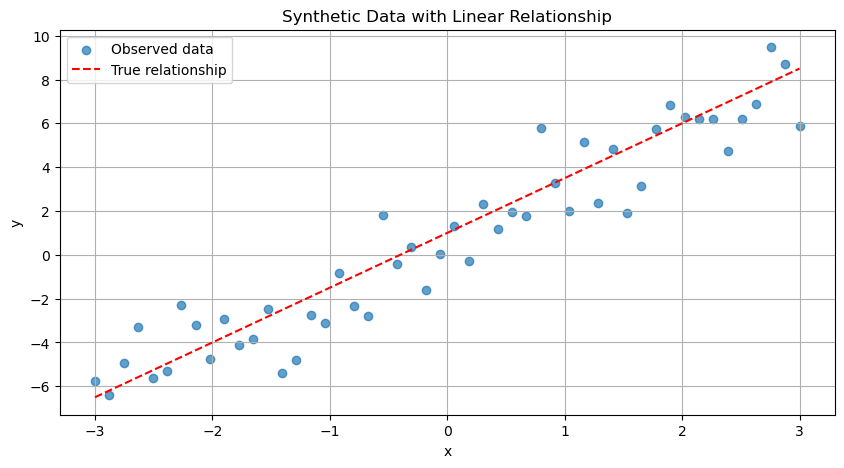

In [2]:
true_slope = 2.5
true_intercept = 1.0
noise_std = 1.5

n_points = 50
x = np.linspace(-3, 3, n_points)
y = true_slope * x + true_intercept + np.random.normal(0, noise_std, n_points)

plt.figure(figsize=(10,5))
plt.scatter(x, y, alpha=0.7, label='Observed data')
plt.plot(x, true_slope*x + true_intercept, 'r--', label='True relationship')
plt.title("Synthetic Data with Linear Relationship")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

## 3. Bayesian Linear Regression Setup
### Model:
$y = w_0 + w_1x + \epsilon$, $\epsilon \sim \mathcal{N}(0, \sigma^2)$ 

### Prior:
$p(\mathbf{w}) = \mathcal{N}(\mathbf{w} | \mu_0, \Sigma_0)$

### Posterior:
$p(\mathbf{w} | X,y) = \mathcal{N}(\mathbf{w} | \mu_n, \Sigma_n)$

Where:
$$
\Sigma_n^{-1} = \Sigma_0^{-1} + \frac{1}{\sigma^2}X^\top X
$$
and
$$
\mu_n = \Sigma_n\left(\Sigma_0^{-1}\mu_0 + \frac{1}{\sigma^2}X^\top y\right)
$$

In [3]:
X = np.vstack([np.ones_like(x), x]).T

# Prior parameters
mu_0 = np.array([0.0, 0.0])
Sigma_0 = np.array([[2.0, 0.0],
                    [0.0, 2.0]])

sigma = noise_std

## 4. Compute Posterior Distribution

In [4]:
Sigma_n_inv = np.linalg.inv(Sigma_0) + (1/sigma**2) * X.T @ X
Sigma_n = np.linalg.inv(Sigma_n_inv)
mu_n = Sigma_n @ (np.linalg.inv(Sigma_0) @ mu_0 + (1/sigma**2) * X.T @ y)

print("Posterior mean:", mu_n)
print("Posterior covariance:\n", Sigma_n)

Posterior mean: [0.64722654 2.33819276]
Posterior covariance:
 [[4.40097800e-02 4.19478384e-19]
 [2.09739192e-18 1.43086582e-02]]


## 5. Visualize Results

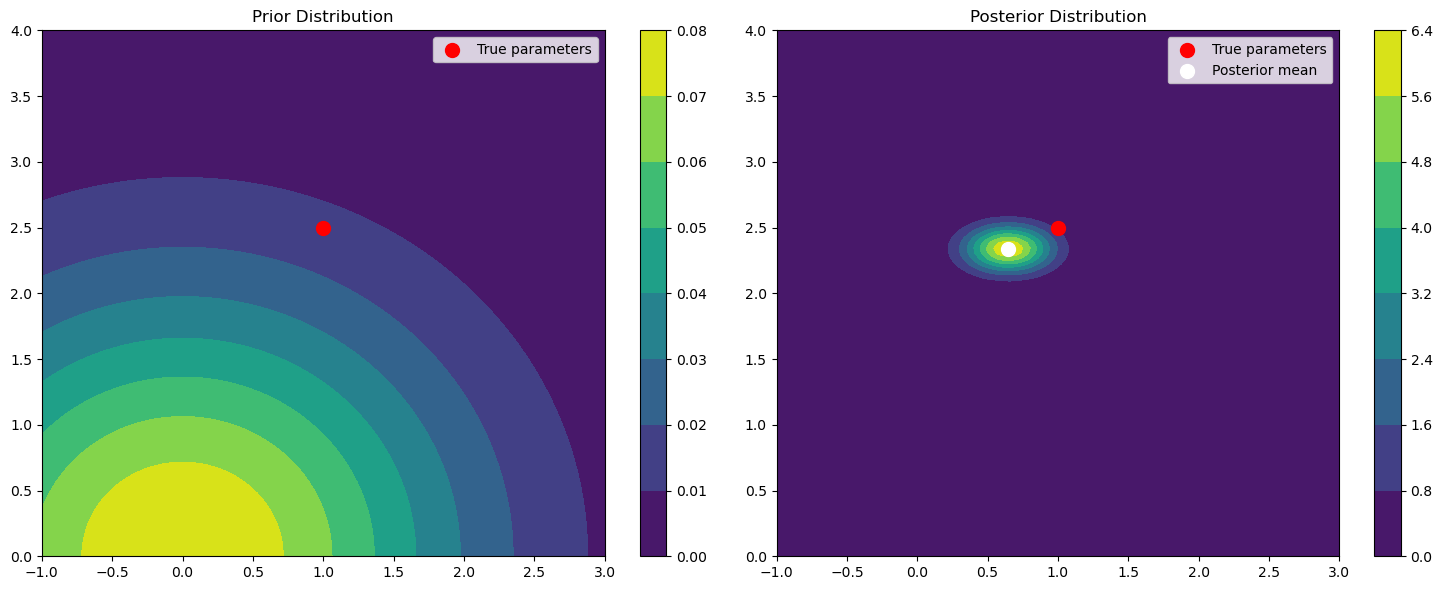

In [5]:
w0 = np.linspace(-1, 3, 100)
w1 = np.linspace(0, 4, 100)
W0, W1 = np.meshgrid(w0, w1)
pos = np.dstack((W0, W1))

prior = multivariate_normal(mu_0, Sigma_0)
posterior = multivariate_normal(mu_n, Sigma_n)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))

# Prior plot
cs = ax1.contourf(W0, W1, prior.pdf(pos), cmap='viridis')
ax1.scatter(true_intercept, true_slope, c='red', s=100, label='True parameters')
ax1.set_title('Prior Distribution')
plt.colorbar(cs, ax=ax1)
ax1.legend()

# Posterior plot
cs = ax2.contourf(W0, W1, posterior.pdf(pos), cmap='viridis')
ax2.scatter(true_intercept, true_slope, c='red', s=100, label='True parameters')
ax2.scatter(mu_n[0], mu_n[1], c='white', s=100, label='Posterior mean')
ax2.set_title('Posterior Distribution')
plt.colorbar(cs, ax=ax2)
ax2.legend()

plt.tight_layout()
plt.show()

## 6. Posterior Predictive Distribution

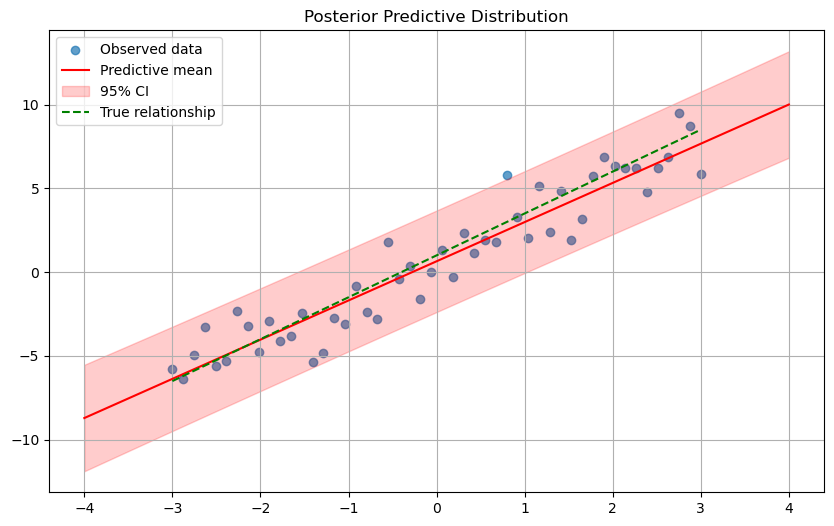

In [6]:
x_test = np.linspace(-4, 4, 100)
X_test = np.vstack([np.ones_like(x_test), x_test]).T

y_mean = X_test @ mu_n
y_var = np.diag(X_test @ Sigma_n @ X_test.T) + sigma**2

plt.figure(figsize=(10,6))
plt.scatter(x, y, alpha=0.7, label='Observed data')
plt.plot(x_test, y_mean, 'r-', label='Predictive mean')
plt.fill_between(x_test, 
                 y_mean - 2*np.sqrt(y_var), 
                 y_mean + 2*np.sqrt(y_var), 
                 color='red', alpha=0.2, label='95% CI')
plt.plot(x, true_slope*x + true_intercept, 'g--', label='True relationship')
plt.title("Posterior Predictive Distribution")
plt.legend()
plt.grid(True)
plt.show()

## 7. Exercises
1. **Prior Sensitivity**: Try different prior means (μ₀) and covariances (Σ₀)
2. **Data Quantity**: Reduce to n=10 points
3. **Noise Level**: Set σ=3.0